In [435]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [436]:
#создадим тензор Х размером 20*3
#заполним случайными данными
X = np.random.sample((20, 3))
#создадим тензор y размером 1*20
#заполним случайным образом числами 0 и 1
y = np.random.random_integers(0,1,size=20)

In [420]:
#обучим логистическую регрессию на данных
clf_log_reg = LogisticRegression()
clf_log_reg.fit(X,y)
#в качестве предсказаний классификатора
#возьмем предсказанные вероятности отнесения
# к классу 1
log_reg_pred = clf_log_reg.predict_proba(X)[:,1]

In [421]:
#полученные данные запишем в DataFrame
act_pred_table = pd.DataFrame({'Actual_class':y,'Predict_probably_1':log_reg_pred})

In [422]:
#Шаг 1. Сортируем все наблюдения по убыванию спрогнозированной вероятности класса 1
sort_table = act_pred_table.sort_values(by=['Predict_probably_1'],ascending=False)

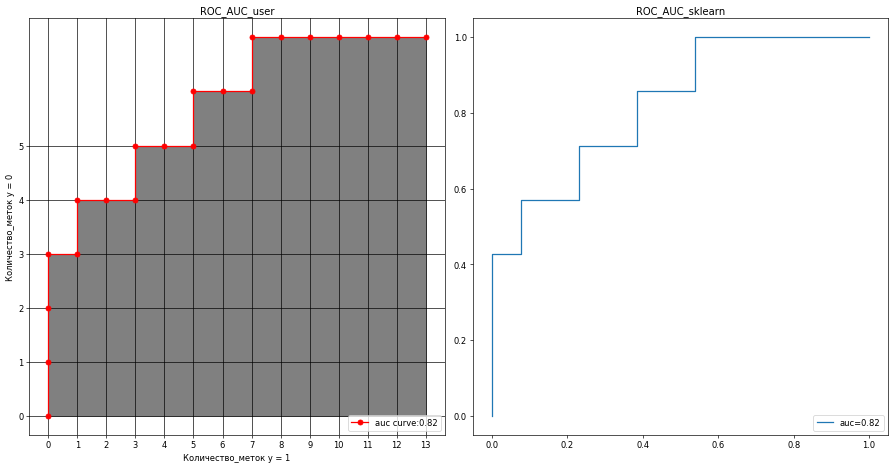

In [423]:
#Шаг 2.Берем единичный квадрат на координатной плоскости,
#разбиваем его на m равных частей горизонтальными линиями и 
#на n – вертикальными, где m – метка класса '1' среди меток теста, 
#n – число меток '0'.  
#В результате квадрат разбивается сеткой на m×n блоков(в приведенном примере 5х15)
# Создадим два списка для хранения значений x и y
x_values = []
y_values = []
plt.figure(figsize=(15, 15), dpi= 60)
plt.subplot(2,2,1)
#Шаг.3 Теперь будем просматривать строки sort_table сверху вниз и 
#прорисовывать на сетке линии, переходя их одного узла в другой. 
#Стартуем из точки (0, 0).
start = [0,0]
plt.plot(start[0],start[1], color='red', marker='o')
x_values.append(start[0])
y_values.append(start[1])
#Если значение метки класса в просматриваемой строке 1, то делаем шаг вверх; 
#если 0, то делаем шаг вправо.
for row in range(len(sort_table)):
    past = [start[0],start[1]]
    try:
        if sort_table.iloc[row,:]['Actual_class']!=\
        sort_table.iloc[row+1,:]['Actual_class']\
        and sort_table.iloc[row,:]['Predict_probably_1']==\
        sort_table.iloc[row+1,:]['Predict_probably_1']:
            plt.plot(start[0]+1,start[1]+1, color='red', marker='o')       
            start[0]+=1
            start[1]+=1
            x_values.append(start[0])
            y_values.append(start[1])
    except IndexError:
        pass 
    if sort_table.iloc[row,:]['Actual_class']==1:
            plt.plot(start[0],start[1]+1, color='red', marker='o')
            start[1]+=1
            plt.vlines(past[0],past[1],start[1],color = 'r')
            x_values.append(start[0])
            y_values.append(start[1])
    else:
            plt.plot(start[0]+1,start[1], color='red', marker='o')
            start[0]+=1
            plt.hlines(past[1],past[0],start[0],color = 'r')
            x_values.append(start[0])
            y_values.append(start[1])
#Далее есть 2 способа посчитать ROC_AUC:
#Первый - двигаться по сортированному фрейму снизу вверх и суммировать
#количество меток класса 1 находящихся выше наблюдаемого значения
list_act_val = list(sort_table[::-1]['Actual_class'])
num_cl_1 = 0
for el in range(len(list_act_val)):
    if list_act_val[el]==0:
        num_cl_1+= list_act_val[el:].count(1)
        
auc = 1/(list_act_val.count(1)*list_act_val.count(0))*num_cl_1
#Второй поделить количество ячеек под ROC Curve на общее количество ячеек
# в нашем случае 64/75

# отрисуем график
#  Добавляем линии основной сетки:
plt.grid(which='major',
        color = 'k')
#  Устанавливаем интервал основных делений
plt.xticks(list(range(0,16)))
plt.yticks(list(range(6)))
plt.xlabel('Количество_меток y = 1')
plt.ylabel('Количество_меток y = 0')
plt.title('ROC_AUC_user')
plt.legend(['auc curve:'+str(round(auc,2))],loc='lower right')
plt.fill_between(x_values,y_values,color='grey')

# убедимся в правильности решения
# построим ROC и посчитаем AUC средствами sklearn
plt.subplot(2,2,2)
fpr, tpr, _ = metrics.roc_curve(y,log_reg_pred)
auc_sklearn = metrics.roc_auc_score(y,log_reg_pred)
plt.title('ROC_AUC_sklearn')
plt.plot(fpr,tpr,label="auc="+str(round(auc_sklearn,2)))
plt.legend(loc=4)
plt.tight_layout();